In [14]:
import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import GetFilenames, csv_dic_df
from converter import toSeconds
import pandas as pd
import csv

teams = [
    'Bournemouth',
    'Arsenal',
    'Villa',
    'Chelsea',
    'Crystal',
    'Everton',
    'Leicester',
    'Liverpool',
    'City',
    'United',
    'Newcastle',
    'Norwich',
    'Southampton',
    'Stoke',
    'Sunderland',
    'Swansea',
    'Tottenham',
    'Watford',
    'WestBromwich',
    'WestHam',
]

def count_fh_tweets(filePath):
    GW = filePath.split('/')[0]
    home_team = filePath[:-4].split('/')[2].split('_')[0]
    awaya_team = filePath[:-4].split('/')[2].split('_')[2]
    print(GW, home_team, awaya_team)

    # Change home directory
    pathData = "/Users/Bya/Dropbox/Research/datas/"
    os.chdir(pathData)    
    
    # read csv as df
    df = csv_dic_df(filePath)
    
    # add 'time' column
    df['time'] = df['date']
    df.time = [toSeconds(date) for date in df.time]

    # set time
    start = df.time[0]
    half_time = start + 3600

    FT_tweets = len(df)
    HT_tweets = len(df[(df.time < half_time)])
    HT_tweets_home = len(df[(df.time < half_time) & (df.side == 'home')])
    HT_tweets_away = len(df[(df.time < half_time) & (df.side == 'away')])

    dic_teams_HT[home_team].append(HT_tweets_home)
    dic_teams_HT[awaya_team].append(HT_tweets_away)
    
    del df

# create dic for count tweets
dic_teams_HT = {}
for team in teams:
    dic_teams_HT[team] = []

In [15]:
# Change home directory
pathData = "/Users/Bya/Dropbox/Research/datas/"
os.chdir(pathData)

# Change the weeknumber
weeknumbers = range(5, 11)

for weeknumber in weeknumbers:
    filenames = GetFilenames('GW' + str(weeknumber) + '/SingleGames')
    for filename in filenames:
        count_fh_tweets(filename)
dic_teams_HT

GW5 Arsenal Stoke
GW5 Crystal City
GW5 Everton Chelsea
GW5 Leicester Villa
GW5 Norwich Bournemouth
GW5 Sunderland Tottenham
GW5 United Liverpool
GW5 Watford Swansea
GW5 WestBromwich Southampton
GW5 WestHam Newcastle
GW6 Bournemouth Sunderland
GW6 Chelsea Arsenal
GW6 City WestHam
GW6 Liverpool Norwich
GW6 Newcastle Watford
GW6 Southampton United
GW6 Stoke Leicester
GW6 Swansea Everton
GW6 Tottenham Crystal
GW6 Villa WestBromwich
GW7 Leicester Arsenal
GW7 Liverpool Villa
GW7 Newcastle Chelsea
GW7 Southampton Swansea
GW7 Stoke Bournemouth
GW7 Tottenham City
GW7 United Sunderland
GW7 Watford Crystal
GW7 WestBromwich Everton
GW7 WestHam Norwich
GW8 Arsenal United
GW8 Bournemouth Watford
GW8 Chelsea Southampton
GW8 City Newcastle
GW8 Crystal WestBromwich
GW8 Everton Liverpool
GW8 Norwich Leicester
GW8 Sunderland WestHam
GW8 Swansea Tottenham
GW8 Villa Stoke
GW9 Chelsea Villa
GW9 City Bournemouth
GW9 Crystal WestHam
GW9 Everton United
GW9 Newcastle Norwich
GW9 Southampton Leicester
GW9 Swanse

{'Arsenal': [6622, 5416, 4769, 18102, 5191, 6938],
 'Bournemouth': [214, 1065, 420, 520, 543, 517],
 'Chelsea': [11778, 7118, 4988, 9322, 4360, 7590],
 'City': [3085, 6578, 7770, 4228, 9496, 4377],
 'Crystal': [534, 32, 135, 584, 487, 319],
 'Everton': [3029, 593, 1048, 1761, 1604, 1382],
 'Leicester': [527, 639, 593, 894, 375, 284],
 'Liverpool': [10841, 7859, 8508, 13746, 14320, 8720],
 'Newcastle': [3413, 3960, 4171, 3299, 4040, 2994],
 'Norwich': [522, 430, 505, 374, 1494, 219],
 'Southampton': [309, 1018, 519, 1961, 602, 404],
 'Stoke': [358, 506, 160, 141, 603, 480],
 'Sunderland': [1045, 1261, 451, 1557, 375, 1539],
 'Swansea': [206, 146, 140, 1506, 289, 188],
 'Tottenham': [2810, 1951, 4493, 3489, 2719, 1180],
 'United': [25876, 38630, 27290, 36335, 33028, 20059],
 'Villa': [2683, 766, 1289, 741, 1245, 693],
 'Watford': [232, 1178, 136, 593, 567, 935],
 'WestBromwich': [489, 459, 643, 871, 621, 516],
 'WestHam': [1764, 4145, 709, 947, 755, 1032]}

In [16]:
import numpy as np

dic_teams_HT_average = {}
for team in teams:
    dic_teams_HT_average[team] = int(np.mean(dic_teams_HT[team]))

dic_teams_HT_average

{'Arsenal': 7839,
 'Bournemouth': 546,
 'Chelsea': 7526,
 'City': 5922,
 'Crystal': 348,
 'Everton': 1569,
 'Leicester': 552,
 'Liverpool': 10665,
 'Newcastle': 3646,
 'Norwich': 590,
 'Southampton': 802,
 'Stoke': 374,
 'Sunderland': 1038,
 'Swansea': 412,
 'Tottenham': 2773,
 'United': 30203,
 'Villa': 1236,
 'Watford': 606,
 'WestBromwich': 599,
 'WestHam': 1558}

# PLOT

In [9]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## 3D plot

In [68]:
teams = [
        'Arsenal',
        'Bournemouth',
        'Chelsea',
        'City',
        'Crystal',
        'Everton',
        'Leicester',
        'Liverpool',
        'Newcastle',
        'Norwich',
        'Southampton',
        'Stoke',
        'Sunderland',
        'Swansea',
        'Tottenham',
        'United',
        'Villa',
        'Watford',
        'WestBromwich',
        'WestHam']

dic_HT = {
    'Arsenal': [6622, 5416, 4769, 18102, 5191, 6938],
    'Bournemouth': [214, 1065, 420, 520, 543, 517],
    'Chelsea': [11778, 7118, 4988, 9322, 4360, 7590],
    'City': [3085, 6578, 7770, 4228, 9496, 4377],
    'Crystal': [534, 32, 135, 584, 487, 319],
    'Everton': [3029, 593, 1048, 1761, 1604, 1382],
    'Leicester': [527, 639, 593, 894, 375, 284],
    'Liverpool': [10841, 7859, 8508, 13746, 14320, 8720],
    'Newcastle': [3413, 3960, 4171, 3299, 4040, 2994],
    'Norwich': [522, 430, 505, 374, 1494, 219],
    'Southampton': [309, 1018, 519, 1961, 602, 404],
    'Stoke': [358, 506, 160, 141, 603, 480],
    'Sunderland': [1045, 1261, 451, 1557, 375, 1539],
    'Swansea': [206, 146, 140, 1506, 289, 188],
    'Tottenham': [2810, 1951, 4493, 3489, 2719, 1180],
    'United': [25876, 38630, 27290, 36335, 33028, 20059],
    'Villa': [2683, 766, 1289, 741, 1245, 693],
    'Watford': [232, 1178, 136, 593, 567, 935],
    'WestBromwich': [489, 459, 643, 871, 621, 516],
    'WestHam': [1764, 4145, 709, 947, 755, 1032]}

dic_GW = {}

for i in range(5, 11):
    dic_GW[i] = []
    for team in teams:
        dic_GW[i].append(dic_HT[team][i-5])

/Users/Bya/.virtualenvs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


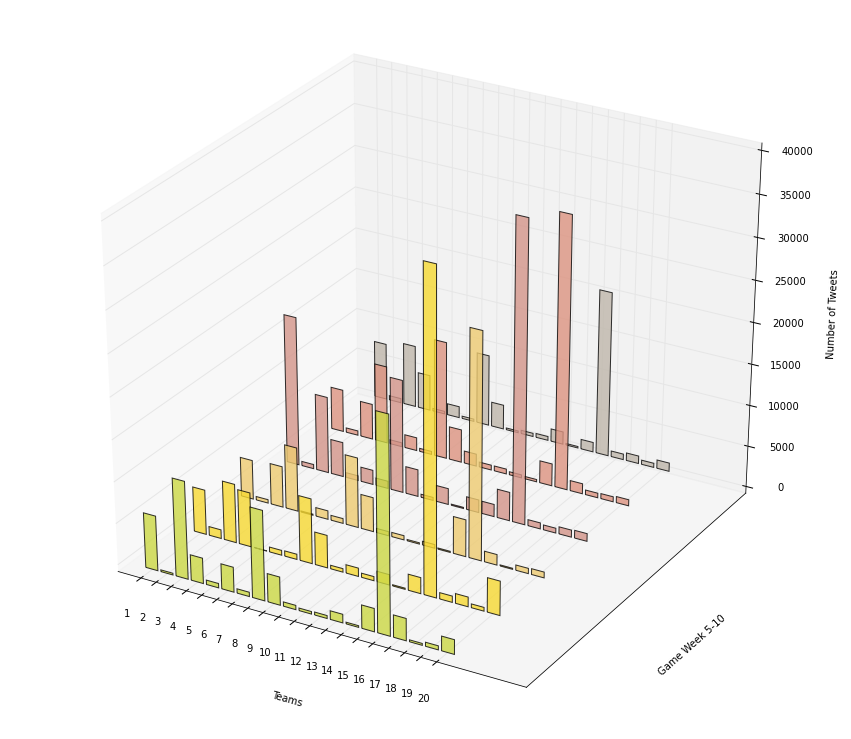

In [24]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

for z in [5, 6, 7, 8, 9, 10]:
    xs = range(1,21)
    ys = dic_GW[z]
    color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))

ax.set_xlabel('Teams')
ax.set_ylabel('Game Week 5-10')
ax.set_zlabel('Number of Tweets')

plt.show()

In [21]:
team_num = {
    
[ 1]'Arsenal': 7839,
[ 2]'Bournemouth': 546,
[ 3]'Chelsea': 7526,
[ 4]'City': 5922,
[ 5]'Crystal': 348,
[ 6]'Everton': 1569,
[ 7]'Leicester': 552,
[ 8]'Liverpool': 10665,
[ 9]'Newcastle': 3646,
[10]'Norwich': 590,
[11]'Southampton': 802,
[12]'Stoke': 374,
[13]'Sunderland': 1038,
[14]'Swansea': 412,
[15]'Tottenham': 2773,
[16]'United': 30203,
[17]'Villa': 1236,
[18]'Watford': 606,
[19]'WestBromwich': 599,
[20]'WestHam': 1558

}

## All Team Bar Plot

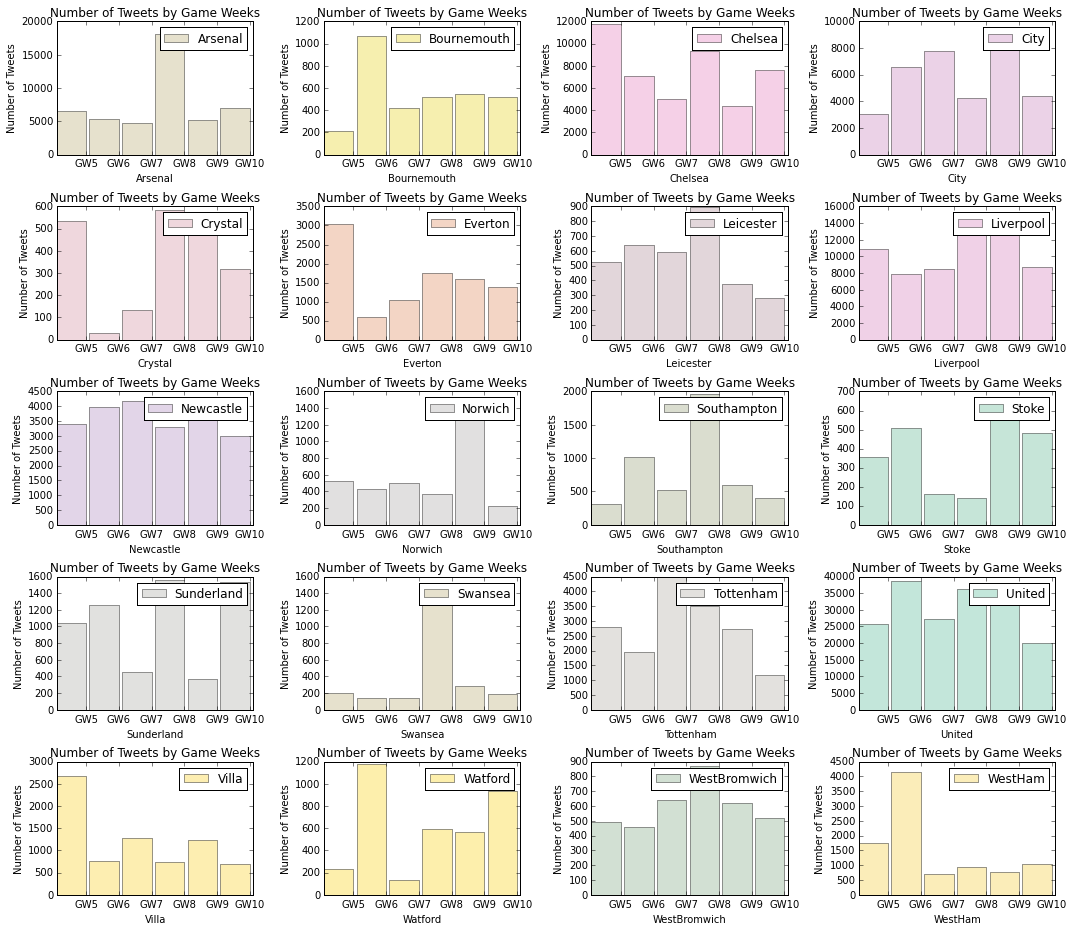

In [79]:
import numpy as np
import matplotlib.pyplot as plt

i = 1
plt.figure(figsize=(15, 13))

for team in teams:
    n_groups = 6

    tweets = tuple(dic_HT[team])



    ax = plt.subplot(5,4,i)
    i += 1

    index = np.arange(n_groups)
    bar_width = 0.9

    opacity = 0.4

    rects1 = plt.bar(index, tweets, bar_width,
                     alpha=opacity,
                     color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N))),
                     label=team)


    plt.xlabel(team)
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets by Game Weeks')
    plt.xticks(index + bar_width, ('GW5', 'GW6', 'GW7', 'GW8', 'GW9', 'GW10'))
    plt.legend()
    plt.tight_layout()

plt.show()

## Match Cumulative Tweet

In [232]:
import math

# Change home directory
pathData = "/Users/Bya/Dropbox/Research/datas/"
os.chdir(pathData)

# Change the weeknumber
weeknumbers = range(5, 11)

# for weeknumber in weeknumbers:
filenames = GetFilenames('GW' + str(10) + '/SingleGames')
filenames

['GW10/SingleGames/Arsenal_vs_Everton.csv',
 'GW10/SingleGames/Bournemouth_vs_Tottenham.csv',
 'GW10/SingleGames/Leicester_vs_Crystal.csv',
 'GW10/SingleGames/Liverpool_vs_Southampton.csv',
 'GW10/SingleGames/Norwich_vs_WestBromwich.csv',
 'GW10/SingleGames/Stoke_vs_Watford.csv',
 'GW10/SingleGames/Sunderland_vs_Newcastle.csv',
 'GW10/SingleGames/United_vs_City.csv',
 'GW10/SingleGames/Villa_vs_Swansea.csv',
 'GW10/SingleGames/WestHam_vs_Chelsea.csv']

In [165]:
def create_minute_dics(df):
    minutes = range(120)
    dic_minutes_home = {}
    dic_minutes_away = {}
    dic_minutes_both = {}
    for minute in minutes:
        try:
            dic_minutes_home[minute] = len(df[(df['side'] == 'home') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_home[minute] = 0


        try:
            dic_minutes_away[minute] = len(df[(df['side'] == 'away') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_away[minute] = 0


        try:
            dic_minutes_both[minute] = len(df[(df['side'] == 'both') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_both[minute] = 0


    dic_minutes_home_cum = {}
    dic_minutes_away_cum = {}
    dic_minutes_both_cum = {}
    for minute in minutes:
        try:
            dic_minutes_home_cum[minute] = len(df[(df['side'] == 'home') & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_home_cum[minute] = 0


        try:
            dic_minutes_away_cum[minute] = len(df[(df['side'] == 'away') & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_away_cum[minute] = 0


        try:
            dic_minutes_both_cum[minute] = len(df[(df['side'] == 'both') & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_both_cum[minute] = 0
        
    return (dic_minutes_home, dic_minutes_away, dic_minutes_both,
            dic_minutes_home_cum, dic_minutes_away_cum, dic_minutes_both_cum)

In [229]:
def plot_noncum_cum(dic_minutes_home, dic_minutes_away, dic_minutes_both,
                    dic_minutes_home_cum, dic_minutes_away_cum, dic_minutes_both_cum, limit=True):

    plt.figure(figsize=(15, 13))


    tweets_home = tuple(list(dic_minutes_home.values()))
    tweets_away = tuple(list(dic_minutes_away.values()))
    tweets_both = tuple(list(dic_minutes_both.values()))

    ax = plt.subplot(2,2,1)
    if limit:
        ax.set_xlim([0, 60])

    plot1 = plt.plot(tweets_home, label=home_team, alpha=0.5, color='green')
    plot2 = plt.plot(tweets_away, label=awaya_team, alpha=0.5, color='red')
    plot3 = plt.plot(tweets_both, label='both', alpha=0.2, color='blue')



    plt.xlabel('Minutes')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets by Minutes')
    plt.legend()
    plt.tight_layout()



    tweets_home = tuple(list(dic_minutes_home_cum.values()))
    tweets_away = tuple(list(dic_minutes_away_cum.values()))
    tweets_both = tuple(list(dic_minutes_both_cum.values()))

    ax = plt.subplot(2,2,2)
    if limit:
        ax.set_xlim([0, 60])

    
    plot1 = plt.plot(tweets_home, label=home_team, alpha=0.5, color='green')
    plot2 = plt.plot(tweets_away, label=awaya_team, alpha=0.5, color='red')
    plot3 = plt.plot(tweets_both, label='both', alpha=0.2, color='blue')



    plt.xlabel('Minutes')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets by Minutes (Cumulative)')
    plt.legend()
    plt.tight_layout()


    plt.show()

In [177]:
dic_results = {
3:"""
1-0	(17)NAISMITH STEVEN
2-0	(22)NAISMITH STEVEN
2-1	MATIC NEMANJA(36)
3-1	(82)NAISMITH STEVEN
""",
    
1:"""
1-0	(31)WALCOTT THEO
2-0	(85)GIROUD OLIVIER
""",

2:"""
0-0	No Scores
0-1	IHEANACHO KELECHI(90)
""",

5:"""
1-0	(35)JEROME CAMERON
2-0	(52)HOOLAHAN WES
3-0	(67)JARVIS MATTHEW
3-1	COOK STEVE(81)
""",
    
8:"""
0-0	No Scores
1-0	(59)IGHALO ODION
""",
9: """
0-0
0-0
""",
    
7:"""
0-0	No Scores
1-0	(49)BLIND DALEY
2-0	(Pen70)HERRERA ANDER
2-1	BENTEKE CHRISTIAN(84)
3-1	(86)MARTIAL ANTHONY
""",

6:"""
0-0	No Scores
0-1	MASON RYAN(82)
""",
    
4:"""
0-1	GREALISH JACK(39)
0-2	GIL CARLES(63)
1-2	(72)DE LAET RITCHIE
2-2	(82)VARDY JAMIE
3-2	(89)DYER NATHAN
""",
    
10 :
"""
1-0	(9)PAYET DIMITRI
2-0	(48)PAYET DIMITRI
"""
    }

GW5 Arsenal Stoke

1-0	(31)WALCOTT THEO
2-0	(85)GIROUD OLIVIER



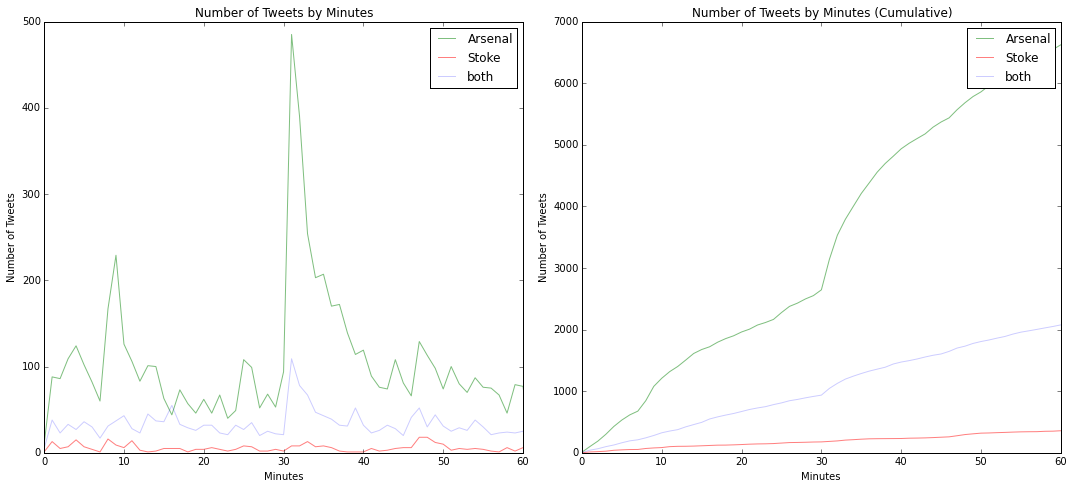

GW5 Crystal City

0-0	No Scores
0-1	IHEANACHO KELECHI(90)



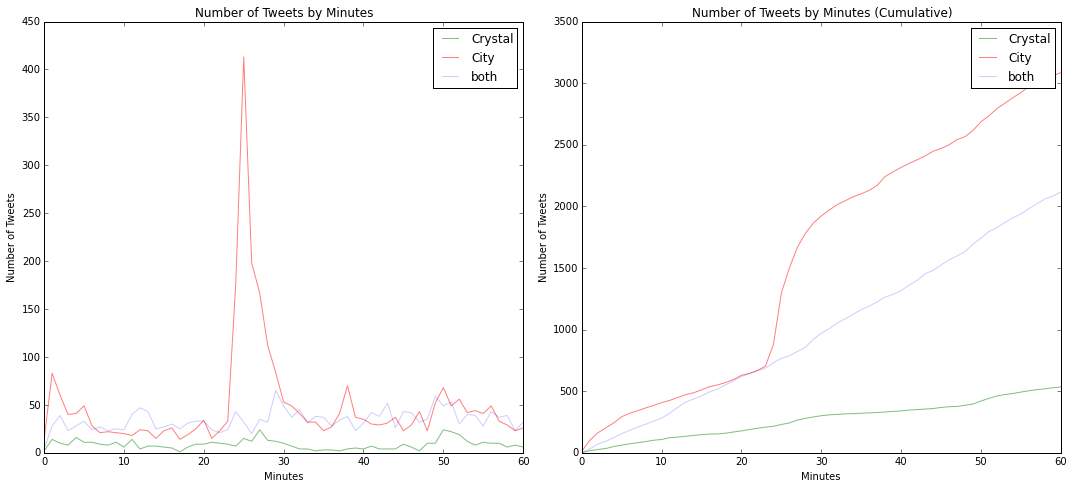

GW5 Everton Chelsea

1-0	(17)NAISMITH STEVEN
2-0	(22)NAISMITH STEVEN
2-1	MATIC NEMANJA(36)
3-1	(82)NAISMITH STEVEN



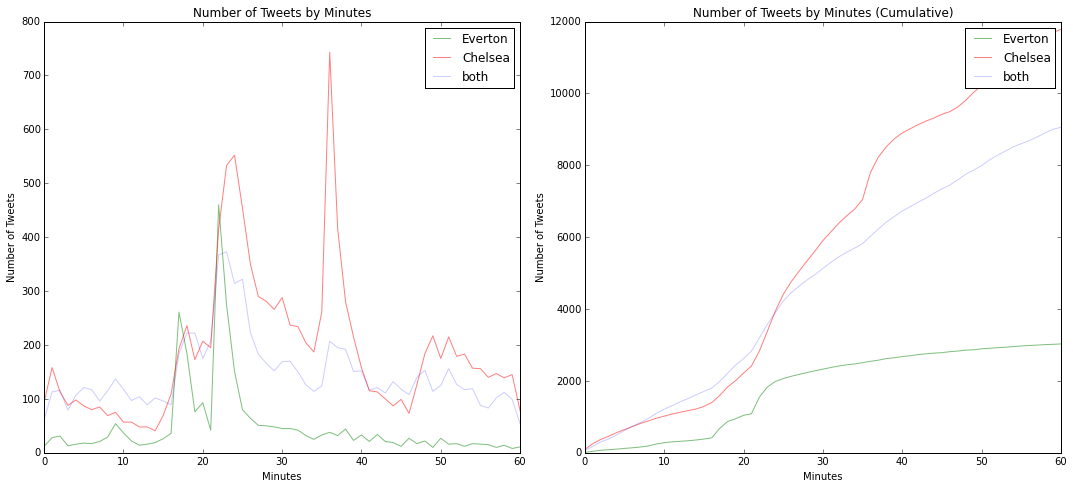

GW5 Leicester Villa

0-1	GREALISH JACK(39)
0-2	GIL CARLES(63)
1-2	(72)DE LAET RITCHIE
2-2	(82)VARDY JAMIE
3-2	(89)DYER NATHAN



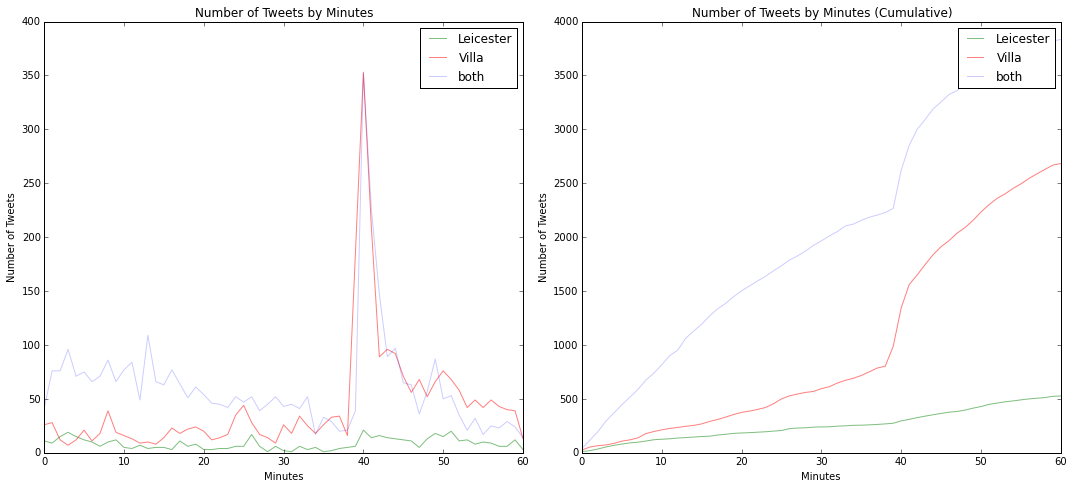

GW5 Norwich Bournemouth

1-0	(35)JEROME CAMERON
2-0	(52)HOOLAHAN WES
3-0	(67)JARVIS MATTHEW
3-1	COOK STEVE(81)



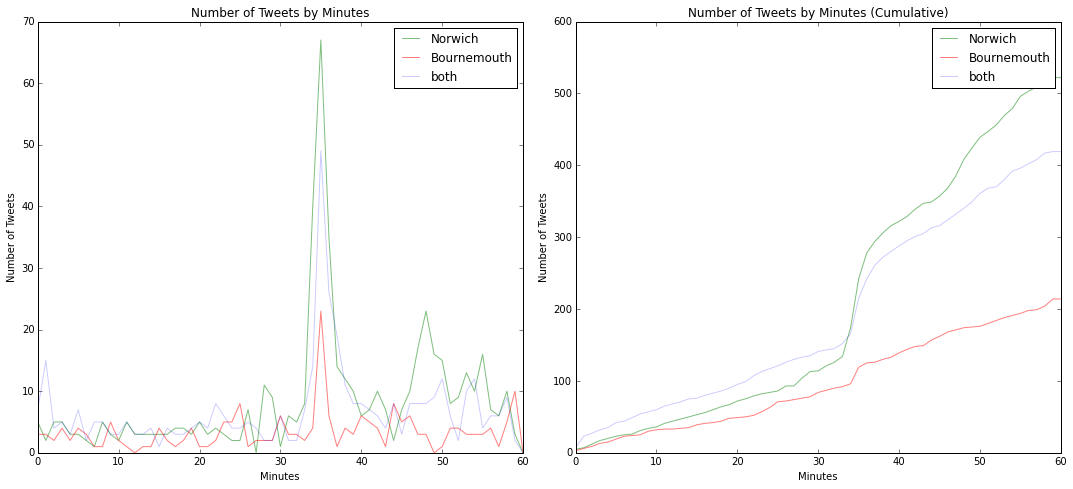

GW5 Sunderland Tottenham

0-0	No Scores
0-1	MASON RYAN(82)



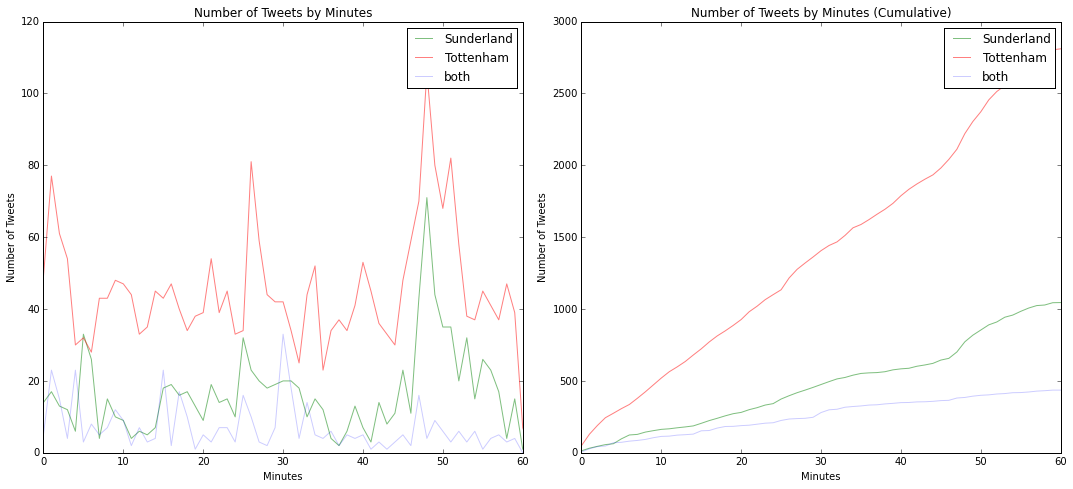

GW5 United Liverpool

0-0	No Scores
1-0	(49)BLIND DALEY
2-0	(Pen70)HERRERA ANDER
2-1	BENTEKE CHRISTIAN(84)
3-1	(86)MARTIAL ANTHONY



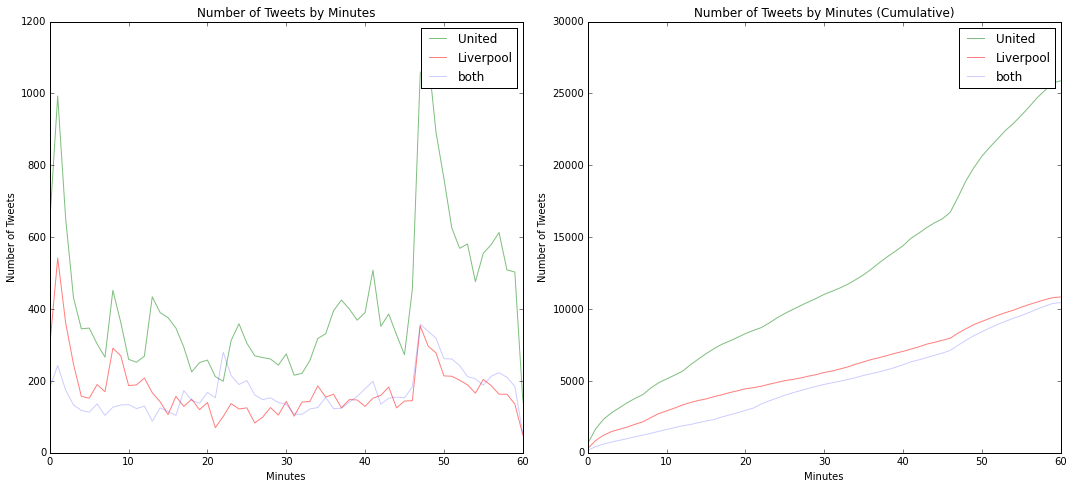

GW5 Watford Swansea

0-0	No Scores
1-0	(59)IGHALO ODION



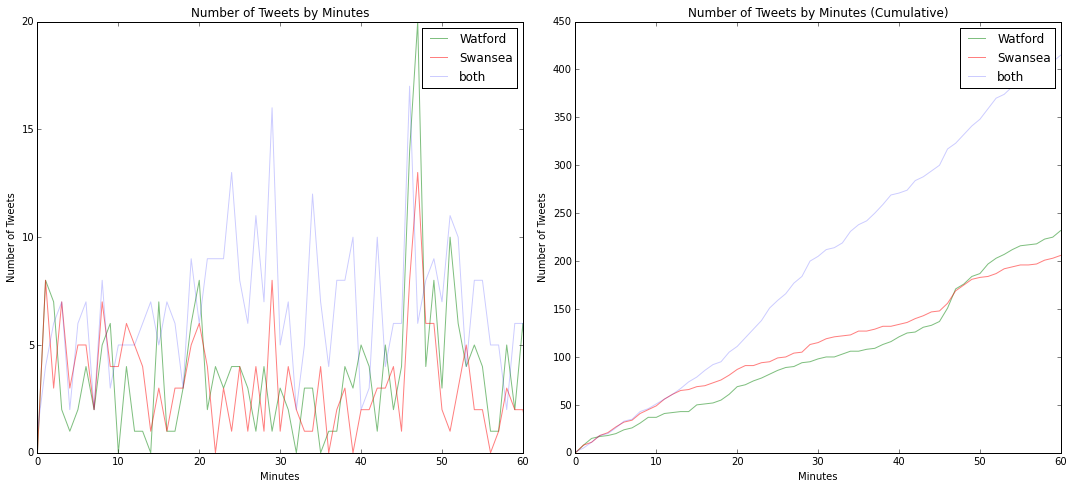

GW5 WestBromwich Southampton

0-0
0-0



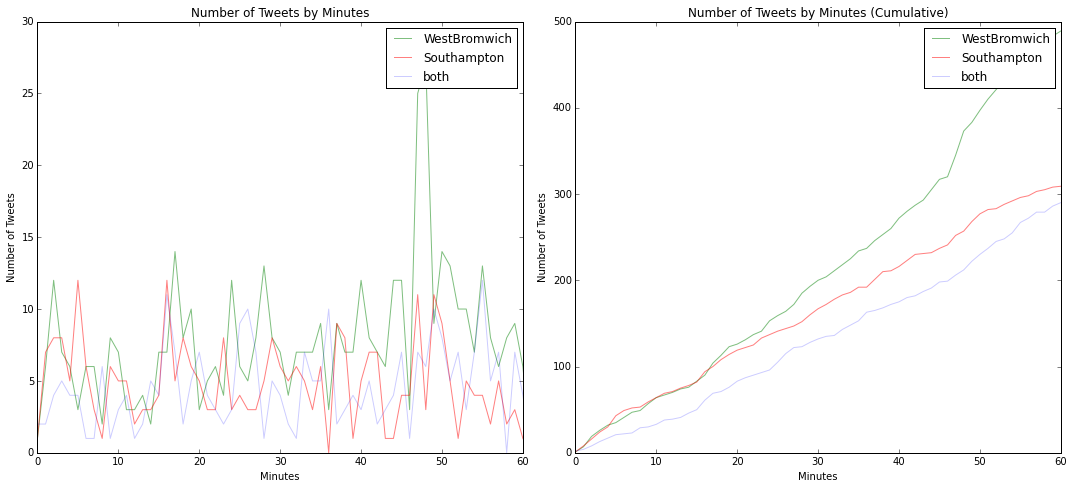

GW5 WestHam Newcastle

1-0	(9)PAYET DIMITRI
2-0	(48)PAYET DIMITRI



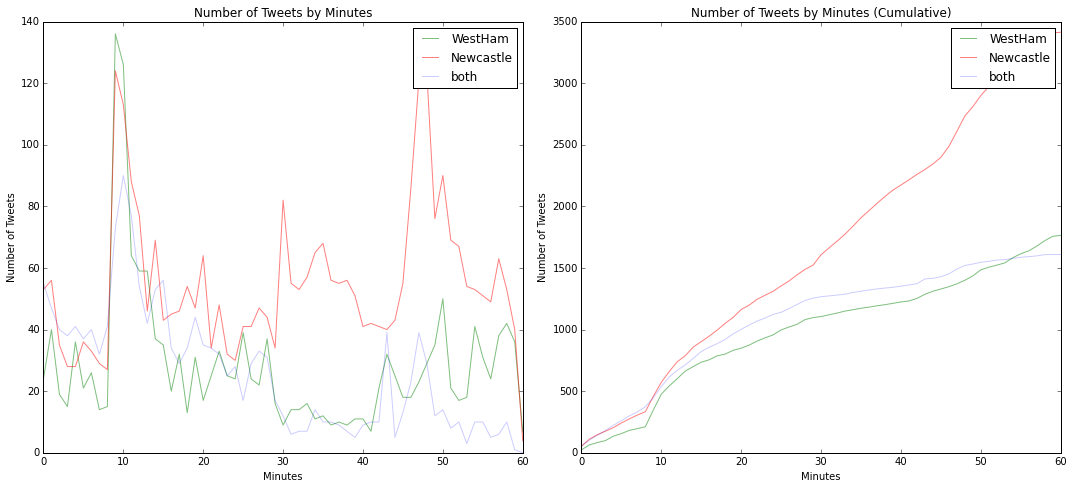

In [180]:
key = 1
for filePath in filenames:
    GW = filePath.split('/')[0]
    home_team = filePath[:-4].split('/')[2].split('_')[0]
    awaya_team = filePath[:-4].split('/')[2].split('_')[2]
    print(GW, home_team, awaya_team)
    print(dic_results[key])
    key += 1

    # Change home directory
    pathData = "/Users/Bya/Dropbox/Research/datas/"
    os.chdir(pathData)    

    # read csv as df
    df = csv_dic_df(filePath)

    # add 'time' column
    df['time'] = df['date']
    df.time = [toSeconds(date) for date in df.time]

    # set time
    start = toSeconds(df.date[0]) - int(df['date'][0][-13:-11])

    # add 'ith_minute'
    df['ith_minute'] = (df['time'] - start) / 60
    
    
    x,y,z,a,b,c = create_minute_dics(df)
    plot_noncum_cum(x,y,z,a,b,c)

In [181]:
dic_results_10 = {
1:"""
1-0	(36)GIROUD OLIVIER
2-0	(38)KOSCIELNY LAURENT
2-1	BARKLEY ROSS(44)
2-1	No Scores
""",

2:"""
1-0	(1)RITCHIE MATT
1-1	KANE HARRY(Pen9)
1-2	DEMBELE MOUSA(17)
1-3	LAMELA ERIK(29)
1-4	KANE HARRY(56)
1-5	KANE HARRY(63)
""",

3:"""
0-0	No Scores
1-0	(59)VARDY JAMIE
""",

4:"""
0-0	No Scores
1-0	(77)BENTEKE CHRISTIAN
1-1	MANE SADIO(86)
""",

5:"""
0-0	No Scores
0-1	RONDON SALOMON(46)
""",

6:"""
0-1	DEENEY TROY(43)
0-2	ABDI ALMEN(69)
""",

7:"""
1-0	(Pen45+3)JOHNSON ADAM
2-0	(65)JONES BILLY
3-0	(86)FLETCHER STEVEN
""",

8:"""
0-0
0-0
""",

9:"""
0-0	No Scores
1-0	(62)AYEW JORDAN
1-1	SIGURDSSON GYLFI(68)
1-2	AYEW ANDRE(87)
""",

10:"""
1-0	(17)ZARATE MAURO
1-1	CAHILL GARY(56)
2-1	(79)CARROLL ANDY
"""
    }

GW10 Arsenal Everton

1-0	(36)GIROUD OLIVIER
2-0	(38)KOSCIELNY LAURENT
2-1	BARKLEY ROSS(44)
2-1	No Scores



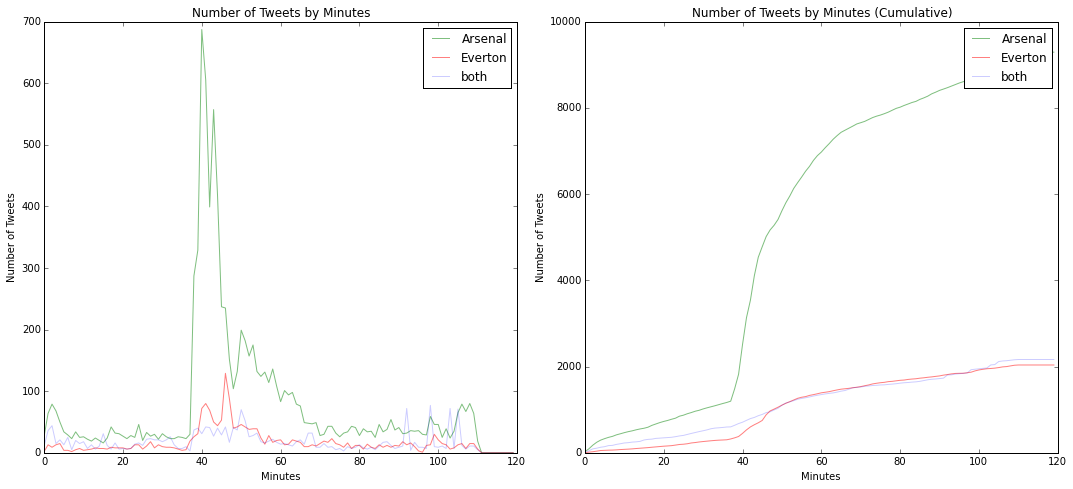

GW10 Bournemouth Tottenham

1-0	(1)RITCHIE MATT
1-1	KANE HARRY(Pen9)
1-2	DEMBELE MOUSA(17)
1-3	LAMELA ERIK(29)
1-4	KANE HARRY(56)
1-5	KANE HARRY(63)



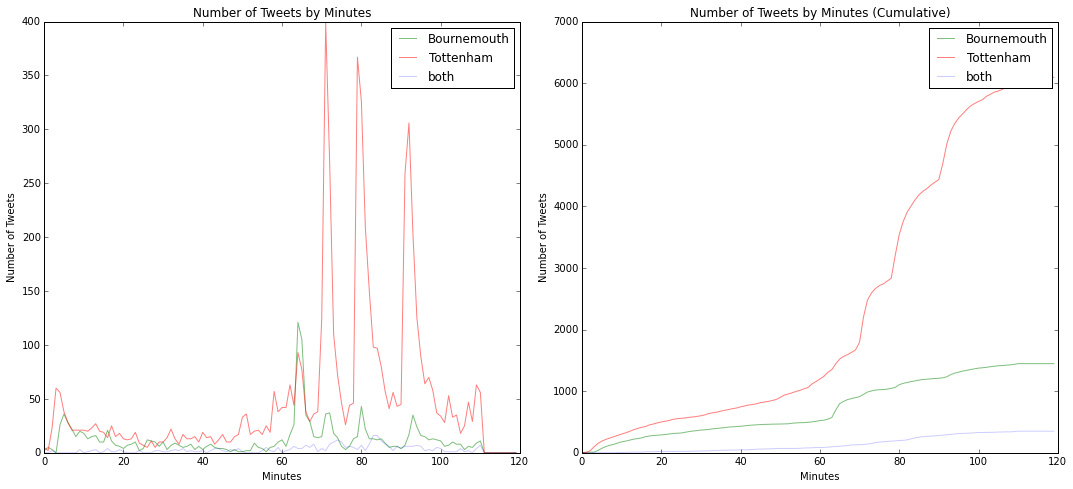

GW10 Leicester Crystal

0-0	No Scores
1-0	(59)VARDY JAMIE



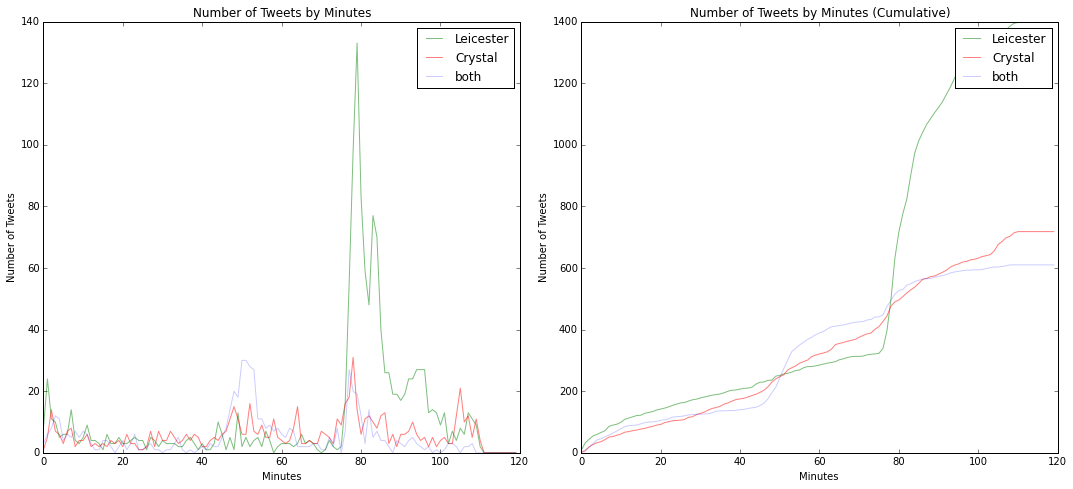

GW10 Liverpool Southampton

0-0	No Scores
1-0	(77)BENTEKE CHRISTIAN
1-1	MANE SADIO(86)



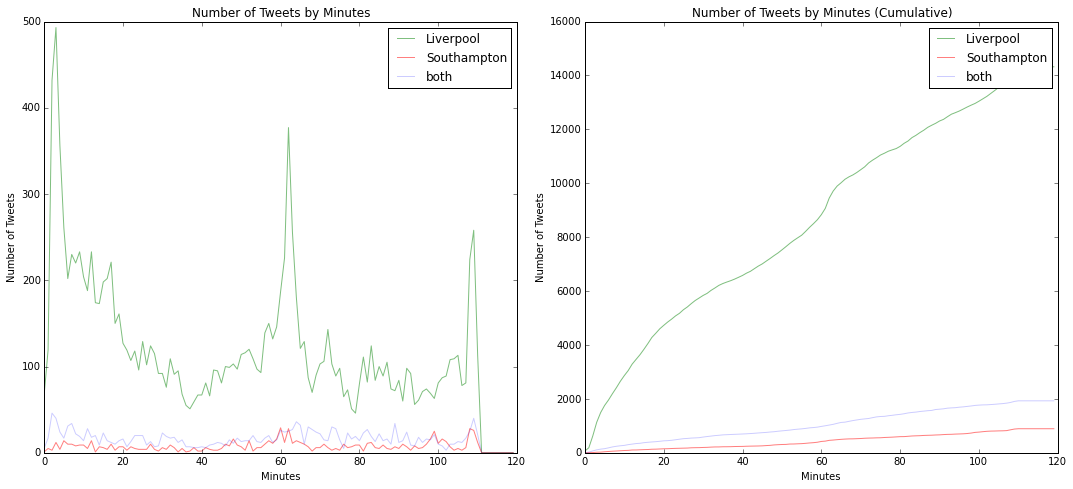

GW10 Norwich WestBromwich

0-0	No Scores
0-1	RONDON SALOMON(46)



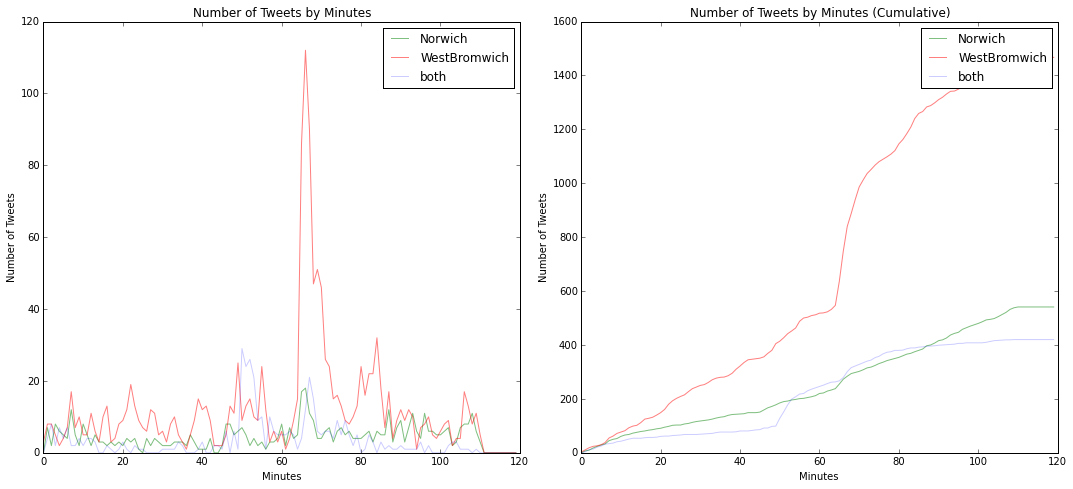

GW10 Stoke Watford

0-1	DEENEY TROY(43)
0-2	ABDI ALMEN(69)



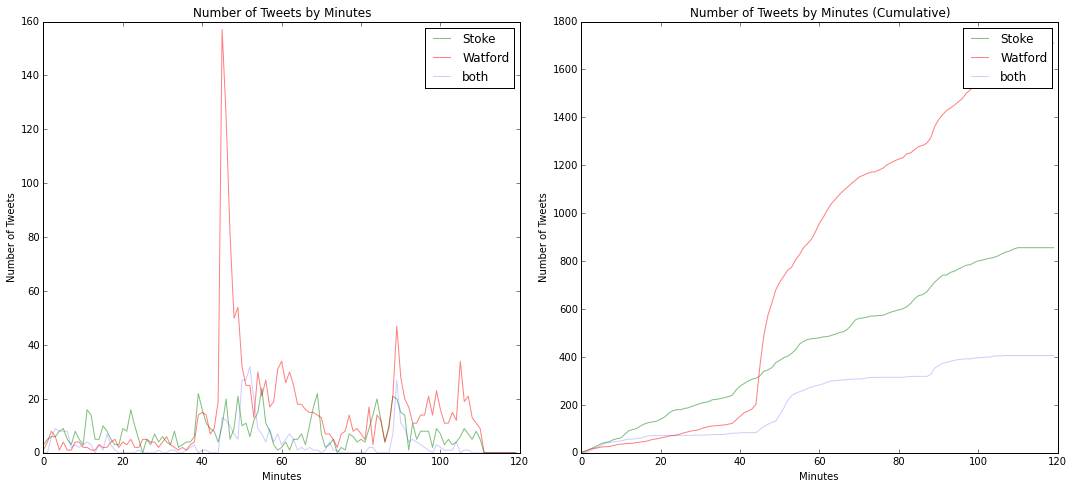

GW10 Sunderland Newcastle

1-0	(Pen45+3)JOHNSON ADAM
2-0	(65)JONES BILLY
3-0	(86)FLETCHER STEVEN



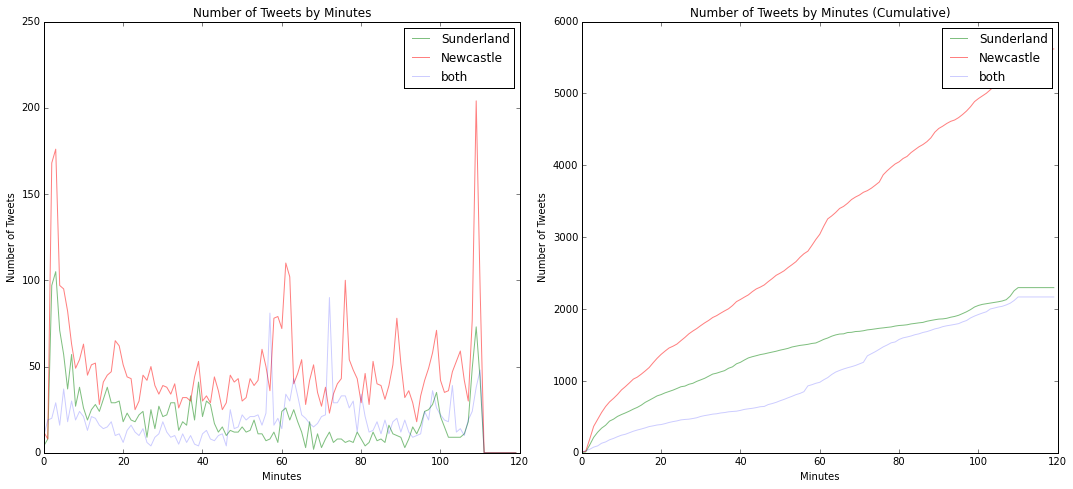

GW10 United City

0-0
0-0



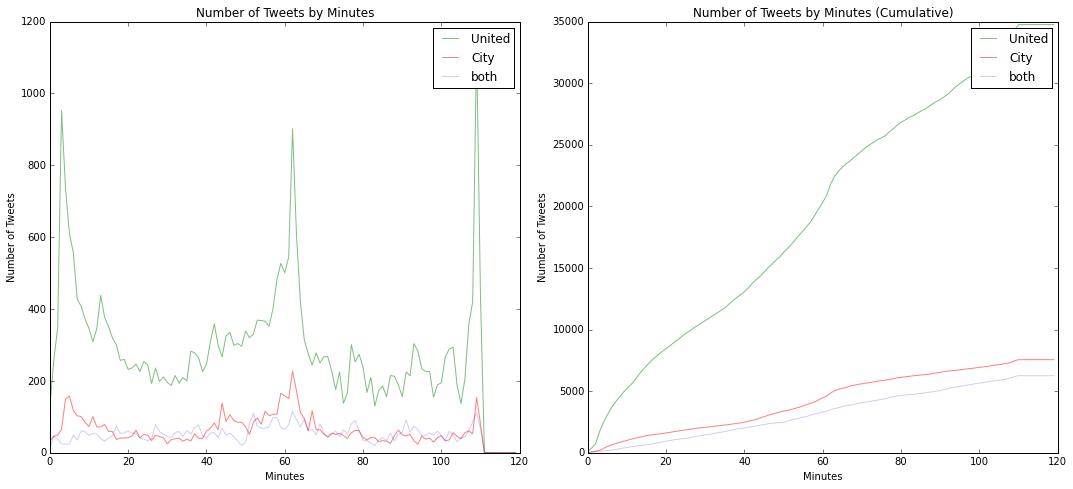

GW10 Villa Swansea

0-0	No Scores
1-0	(62)AYEW JORDAN
1-1	SIGURDSSON GYLFI(68)
1-2	AYEW ANDRE(87)



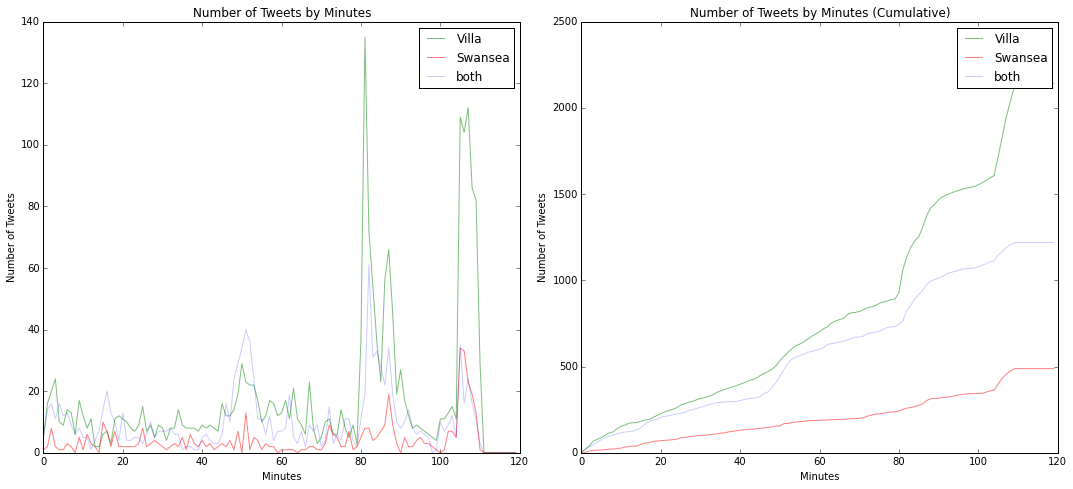

GW10 WestHam Chelsea

1-0	(17)ZARATE MAURO
1-1	CAHILL GARY(56)
2-1	(79)CARROLL ANDY



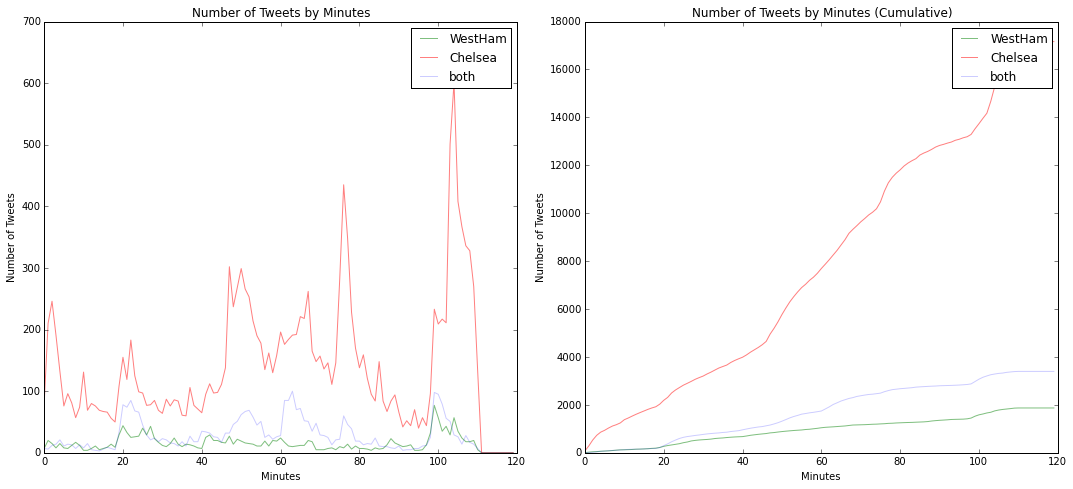

In [233]:
filenames = GetFilenames('GW' + str(10) + '/SingleGames')
key = 1

for filePath in filenames:
    GW = filePath.split('/')[0]
    home_team = filePath[:-4].split('/')[2].split('_')[0]
    awaya_team = filePath[:-4].split('/')[2].split('_')[2]
    print(GW, home_team, awaya_team)
    print(dic_results_10[key])
    key += 1
    
    # Change home directory
    pathData = "/Users/Bya/Dropbox/Research/datas/"
    os.chdir(pathData)    

    # read csv as df
    df = csv_dic_df(filePath)

    # add 'time' column
    df['time'] = df['date']
    df.time = [toSeconds(date) for date in df.time]

    # set time
    start = toSeconds(df.date[0]) - int(df['date'][0][-13:-11])

    # add 'ith_minute'
    df['ith_minute'] = (df['time'] - start) / 60
    
    
    x,y,z,a,b,c = create_minute_dics(df)
    plot_noncum_cum(x,y,z,a,b,c,False)

# Sentiment Plot

In [199]:
def plot_noncum_cum_sentiment(dic_minutes_home_pos, dic_minutes_home_neg,
                              dic_minutes_away_pos, dic_minutes_away_neg, limit=True):

    plt.figure(figsize=(15, 13))


    tweets_home_pos = tuple(list(dic_minutes_home_pos.values()))
    tweets_home_neg = tuple(list(dic_minutes_home_neg.values()))

    ax = plt.subplot(2,2,1)
    if limit:
        ax.set_xlim([0, 60])

    plot1 = plt.plot(tweets_home_pos, label='pos', alpha=0.5, color='green')
    plot2 = plt.plot(tweets_home_neg, label='neg', alpha=0.5, color='red')



    plt.xlabel('Minutes')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Sentiment Tweets by Minutes: ' + home_team)
    plt.legend()
    plt.tight_layout()



    tweets_away_pos = tuple(list(dic_minutes_away_pos.values()))
    tweets_away_neg = tuple(list(dic_minutes_away_neg.values()))

    ax = plt.subplot(2,2,2)
    ax.set_xlim([0, 60])
    
    plot1 = plt.plot(tweets_away_pos, label='pos', alpha=0.5, color='green')
    plot2 = plt.plot(tweets_away_neg, label='neg', alpha=0.5, color='red')



    plt.xlabel('Minutes')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Sentiment Tweets by Minutes (Cumulative): ' + awaya_team)
    plt.legend()
    plt.tight_layout()


    plt.show()

In [227]:
def create_minute_dics_sentiment(df):
    minutes = range(120)
    dic_minutes_home_pos = {}
    dic_minutes_home_neg = {}
    dic_minutes_away_pos = {}
    dic_minutes_away_neg = {}

    for minute in minutes:
        # home
        try:
            dic_minutes_home_pos[minute] = len(df[(df['side'] == 'home') & \
                                              (df['short_sent'] == 'pos') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_home_pos[minute] = 0
        
        try:
            dic_minutes_home_neg[minute] = len(df[(df['side'] == 'home') & \
                                              (df['short_sent'] == 'neg') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_home_neg[minute] = 0
        
        # away
        try:
            dic_minutes_away_pos[minute] = len(df[(df['side'] == 'away') & \
                                              (df['short_sent'] == 'pos') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_away_pos[minute] = 0
        
        try:
            dic_minutes_away_neg[minute] = len(df[(df['side'] == 'away') & \
                                              (df['short_sent'] == 'neg') & \
                                              (df['ith_minute'] > minute) & \
                                              (df['ith_minute'] < minute + 1)])
        except:
            dic_minutes_away_neg[minute] = 0

        
    return (dic_minutes_home_pos, dic_minutes_home_neg,
            dic_minutes_away_pos, dic_minutes_away_neg)

GW5 Arsenal Stoke

1-0	(31)WALCOTT THEO
2-0	(85)GIROUD OLIVIER

Arsenal: 0.418765356265 	Stoke: 0.305475504323


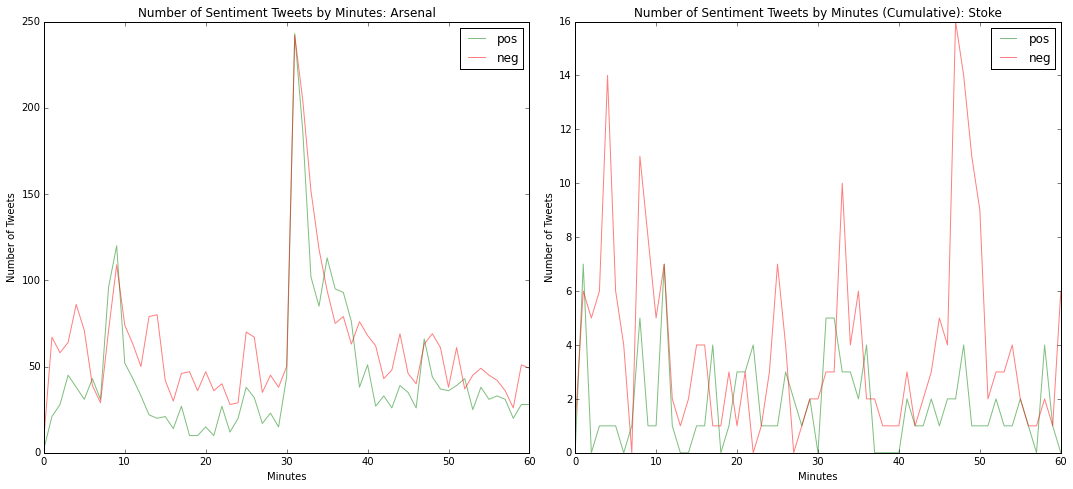

GW5 Crystal City

0-0	No Scores
0-1	IHEANACHO KELECHI(90)

Crystal: 0.516129032258 	City: 0.620803159974


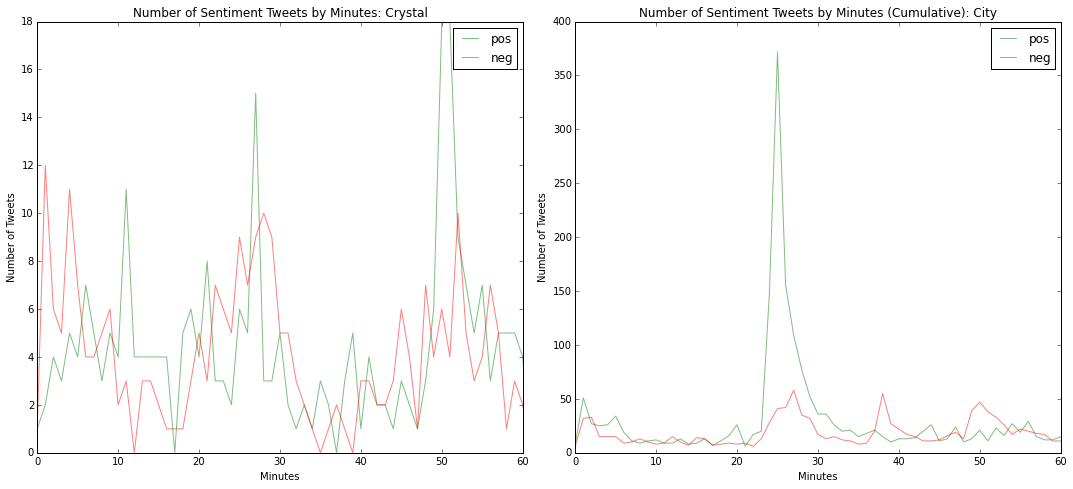

GW5 Everton Chelsea

1-0	(17)NAISMITH STEVEN
2-0	(22)NAISMITH STEVEN
2-1	MATIC NEMANJA(36)
3-1	(82)NAISMITH STEVEN

Everton: 0.509560550151 	Chelsea: 0.426077940033


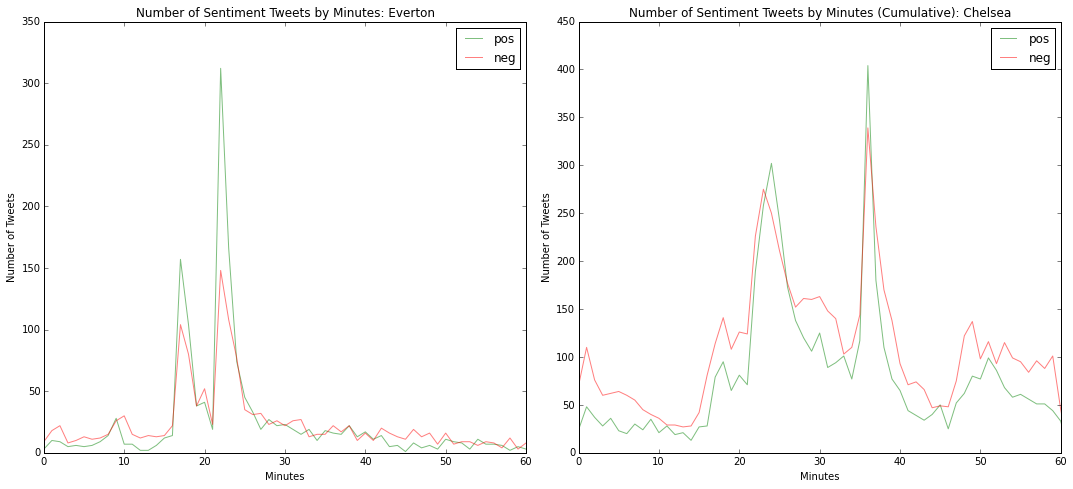

GW5 Leicester Villa

0-1	GREALISH JACK(39)
0-2	GIL CARLES(63)
1-2	(72)DE LAET RITCHIE
2-2	(82)VARDY JAMIE
3-2	(89)DYER NATHAN

Leicester: 0.417794970986 	Villa: 0.600529100529


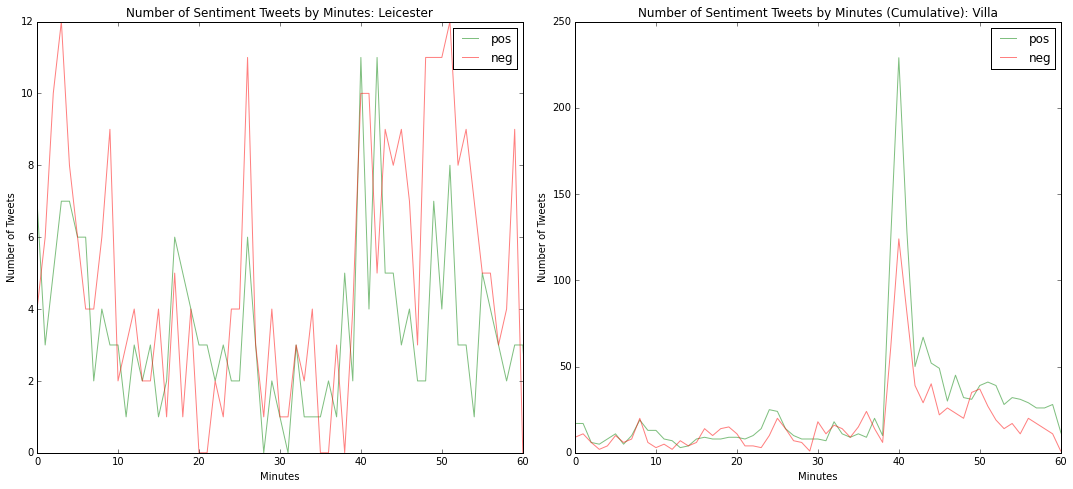

GW5 Norwich Bournemouth

1-0	(35)JEROME CAMERON
2-0	(52)HOOLAHAN WES
3-0	(67)JARVIS MATTHEW
3-1	COOK STEVE(81)

Norwich: 0.460038986355 	Bournemouth: 0.578947368421


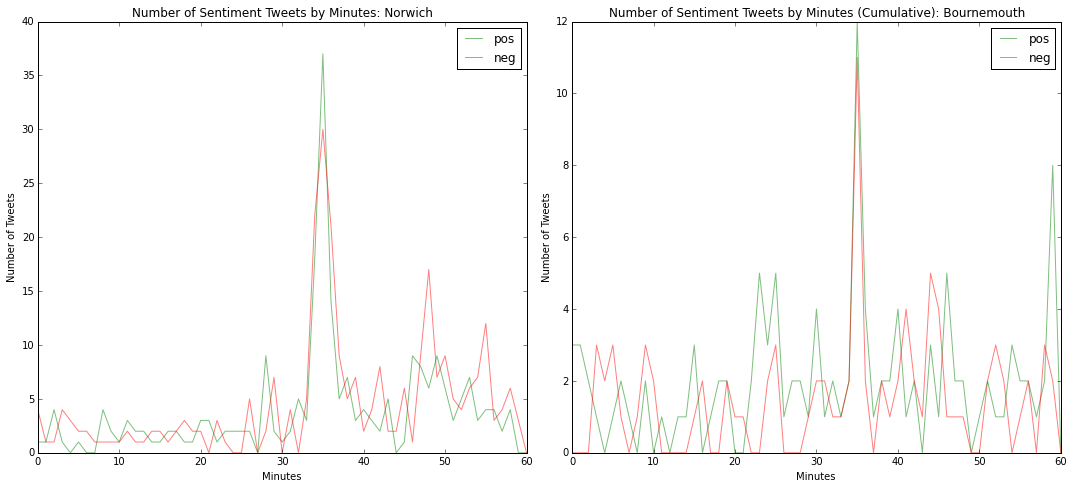

GW5 Sunderland Tottenham

0-0	No Scores
0-1	MASON RYAN(82)

Sunderland: 0.422135161606 	Tottenham: 0.505422993492


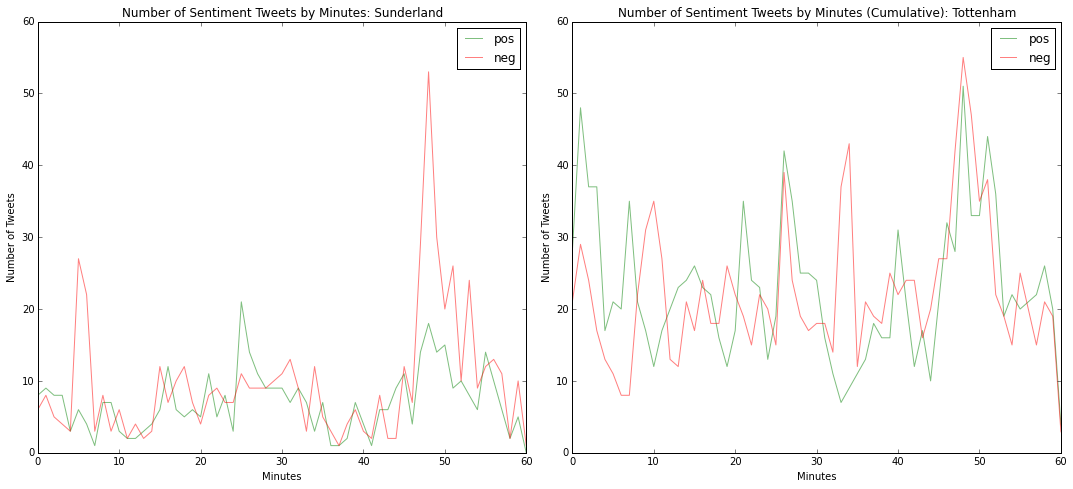

GW5 United Liverpool

0-0	No Scores
1-0	(49)BLIND DALEY
2-0	(Pen70)HERRERA ANDER
2-1	BENTEKE CHRISTIAN(84)
3-1	(86)MARTIAL ANTHONY

United: 0.493519245876 	Liverpool: 0.468356807512


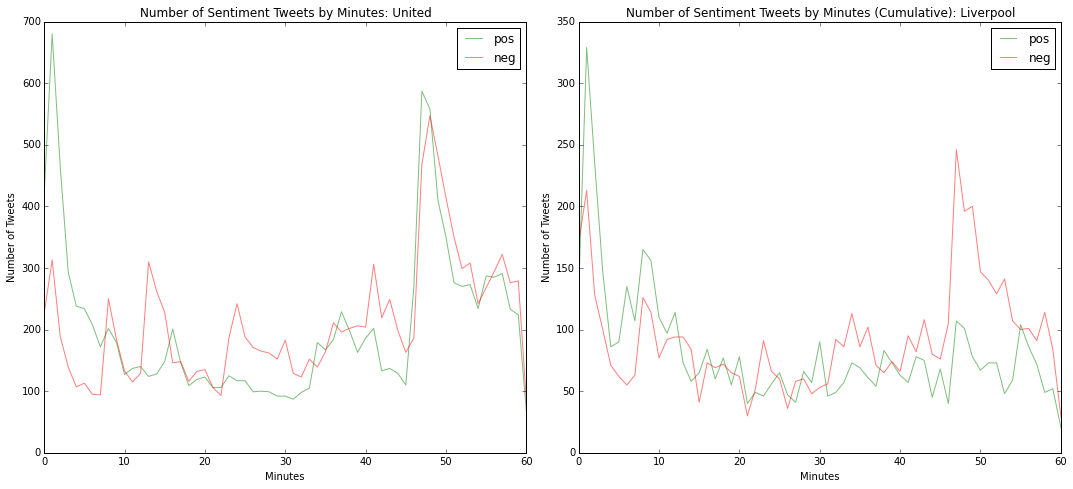

GW5 Watford Swansea

0-0	No Scores
1-0	(59)IGHALO ODION

Watford: 0.484716157205 	Swansea: 0.53


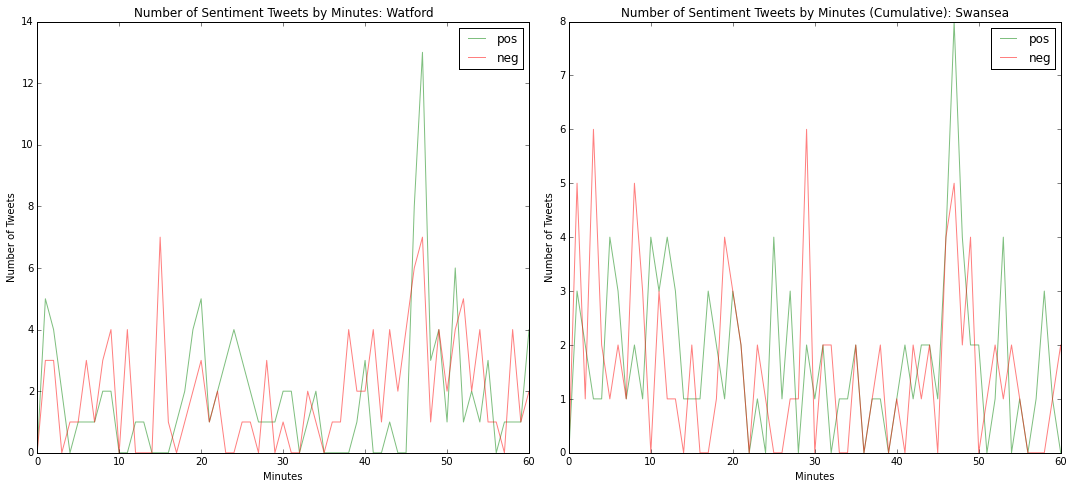

GW5 WestBromwich Southampton

0-0
0-0

WestBromwich: 0.411157024793 	Southampton: 0.421404682274


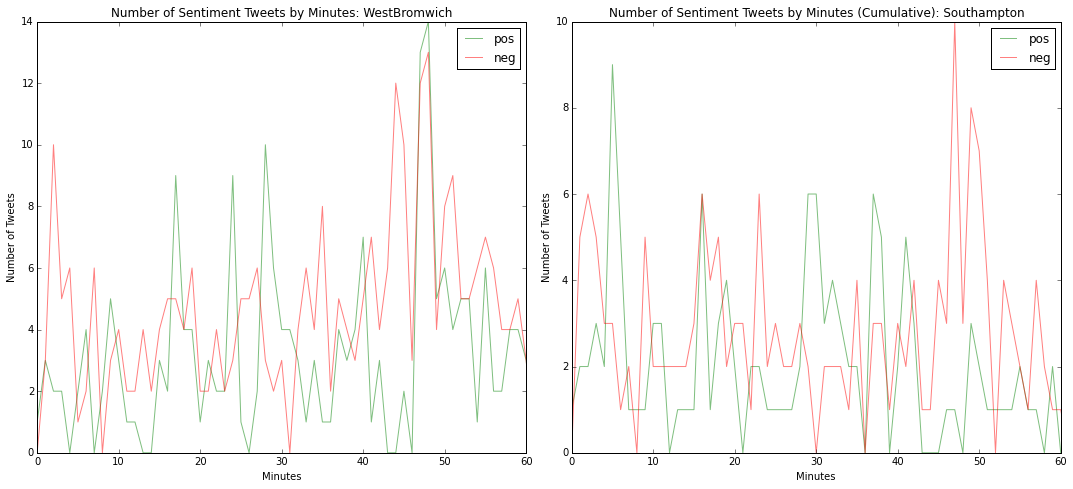

GW5 WestHam Newcastle

1-0	(9)PAYET DIMITRI
2-0	(48)PAYET DIMITRI

WestHam: 0.372346528973 	Newcastle: 0.37123246792


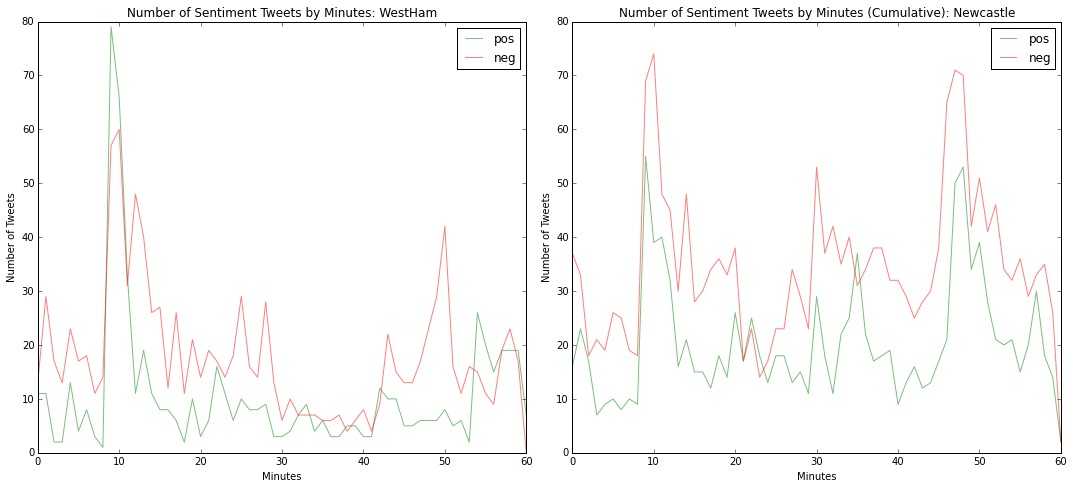

In [228]:
os.chdir('/Users/Bya/Dropbox/Research/datas/Results/NB_Short_Long/')
filenames = GetFilenames('GW' + str(5))
key = 1

for filePath in filenames:
#     filePath = filenames[0]
    GW = filePath.split('/')[0]
    home_team = filePath[:-4].split('/')[1].split('_')[0]
    awaya_team = filePath[:-4].split('/')[1].split('_')[2]
    print(GW, home_team, awaya_team)
    print(dic_results[key])
    key += 1


    # read csv as df
    df = csv_dic_df(filePath)
    df['ith_minute'] = [float(ith_minute) for ith_minute in df['ith_minute']]


    # dics
    x,y,a,b = create_minute_dics_sentiment(df)

    # sentiment %
    sum_home_pos = sum(list(x.values()))
    sum_home_neg = sum(list(y.values()))

    home_pos = sum_home_pos / (sum_home_pos + sum_home_neg)

    sum_away_pos = sum(list(a.values()))
    sum_away_neg = sum(list(b.values()))

    away_pos = sum_away_pos / (sum_away_pos + sum_away_neg)

    print("%s: %s \t%s: %s" %(home_team, home_pos, awaya_team, away_pos))

    # plot
    plot_noncum_cum_sentiment(x,y,a,b)